In [1]:
import pandas as pd
import seaborn as sns
import pandasql as psql
import numpy as np
import matplotlib.pyplot as plt
from dython.nominal import identify_nominal_columns
from scipy import stats
from scipy.stats import chisquare
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import mca
import prince

In [3]:
activities = pd.read_csv('original_data/activity.csv')
grades = pd.read_csv('original_data/grades_numeric.csv')

In [2]:
# activity_grade = pd.merge(activities, grades, on=['egoid'])
# activity_grade.to_csv('original_data/activity_grade.csv', index=False)
activity_grade = pd.read_csv('original_data/activity_grade.csv')

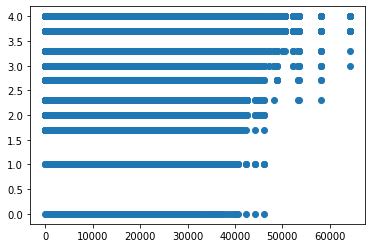

In [7]:
x = activity_grade.steps
y = activity_grade.grade

plt.scatter(x, y)

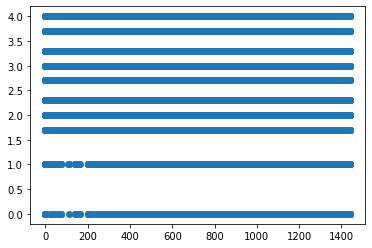

In [8]:
x = activity_grade.sedentaryminutes
y = activity_grade.grade

plt.scatter(x, y)

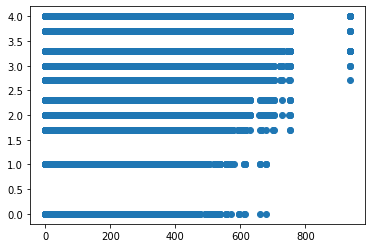

In [9]:
x = activity_grade.lightlyactiveminutes
y = activity_grade.grade

plt.scatter(x, y)

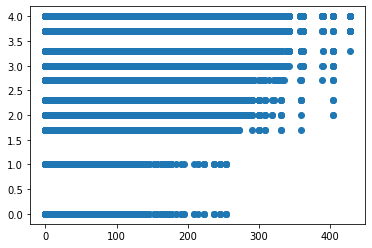

In [10]:
x = activity_grade.fairlyactiveminutes
y = activity_grade.grade

plt.scatter(x, y)

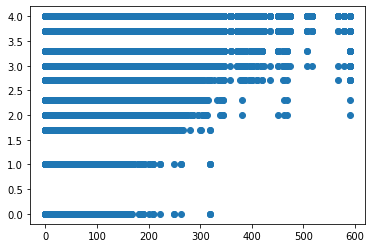

In [11]:
x = activity_grade.veryactiveminutes
y = activity_grade.grade

plt.scatter(x, y)

<AxesSubplot:xlabel='sedentaryminutes', ylabel='grade'>

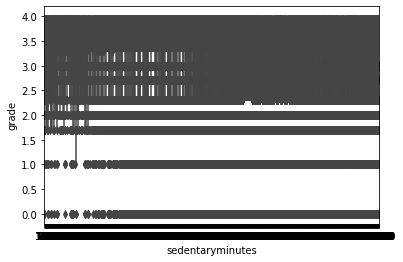

In [3]:
sns.boxplot(x=activity_grade.sedentaryminutes, y=activity_grade.grade)

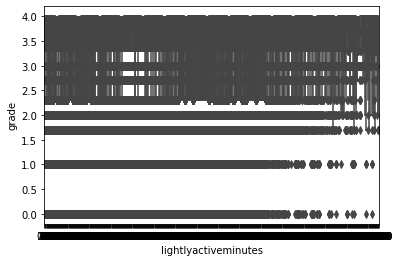

In [5]:
sns.boxplot(x=activity_grade.lightlyactiveminutes, y=activity_grade.grade)

<AxesSubplot:xlabel='fairlyactiveminutes', ylabel='grade'>

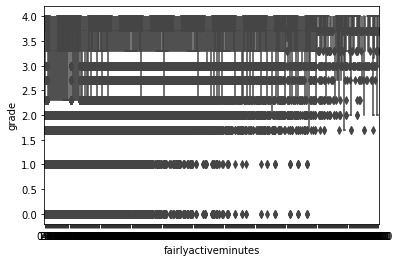

In [6]:
sns.boxplot(x=activity_grade.fairlyactiveminutes, y=activity_grade.grade)

<AxesSubplot:xlabel='veryactiveminutes', ylabel='grade'>

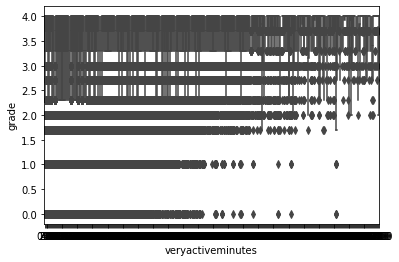

In [7]:
sns.boxplot(x=activity_grade.veryactiveminutes, y=activity_grade.grade)

<AxesSubplot:>

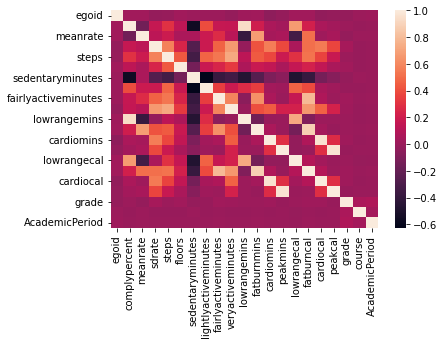

In [12]:
sns.heatmap(activity_grade.corr())

<AxesSubplot:>

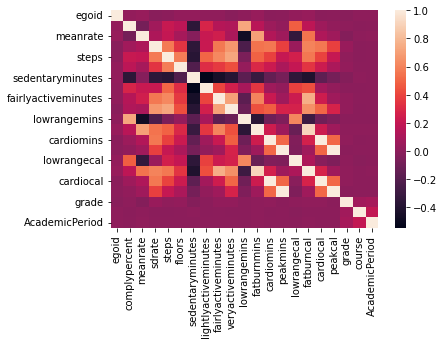

In [4]:
sns.heatmap(activity_grade.corr(method='spearman'))

0.015436950356652046


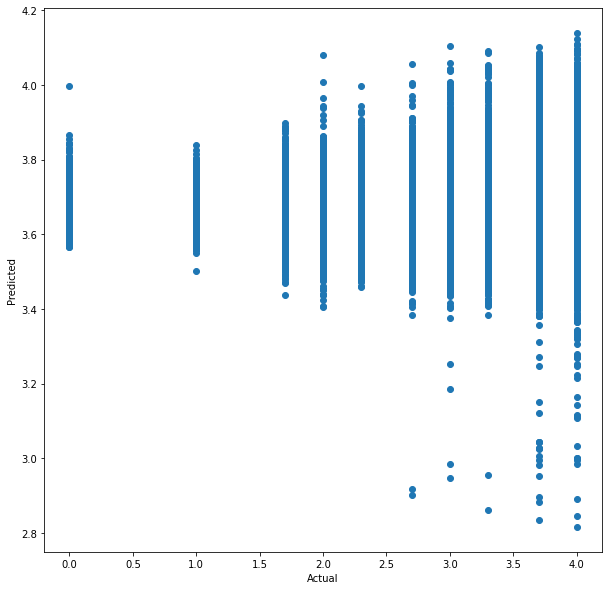

In [13]:
activity_grade_temp = activity_grade.fillna(0)

x = activity_grade_temp.drop(['grade', 'datadate'], axis=1).values
y = activity_grade_temp['grade'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
ml = LinearRegression()
ml.fit(x_train, y_train)

y_pred = ml.predict(x_test)
print(r2_score(y_test, y_pred))

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

ZeroDivisionError: float division by zero

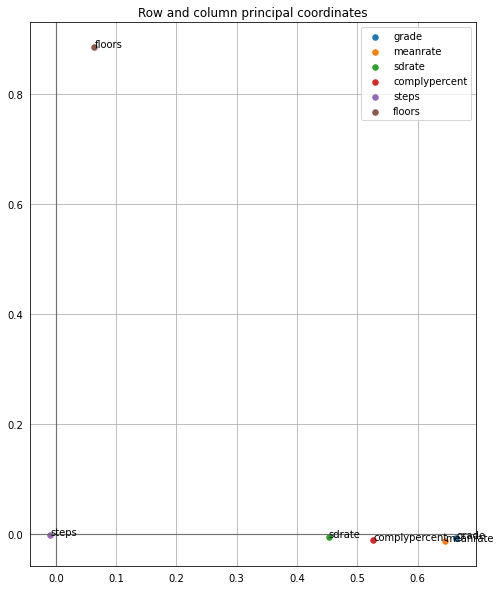

In [21]:
activity_grade_temp = activity_grade[['grade', 'meanrate', 'sdrate', 'complypercent','steps','floors']]
activity_grade_temp = activity_grade_temp.fillna(0)
# for col in activity_grade_temp.columns:
#     activity_grade_temp = activity_grade_temp.loc[activity_grade_temp[col] > 0]

prince_mca = prince.MCA(
        n_components=2,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42
        )
sleep_grade_mca = prince_mca.fit(activity_grade_temp)

ax = sleep_grade_mca.plot_coordinates(
        X=activity_grade_temp,
        ax=None,
        figsize=(8, 10),
        show_row_points=False,
        row_points_size=0,
        show_row_labels=False,
        show_column_points=True,
        column_points_size=30,
        show_column_labels=True,
        legend_n_cols=1
               ).legend(loc='center left', bbox_to_anchor=(1, 0.5))
